# Semana 3 - Dia 1: Árvores de Decisão 🌳

Exemplo prático de **classificação** e **regressão** com scikit-learn.
Sem dependências extras (só matplotlib) para evitar conflitos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

## 1) Classificação — Iris

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=56)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualização da árvore (classificação)

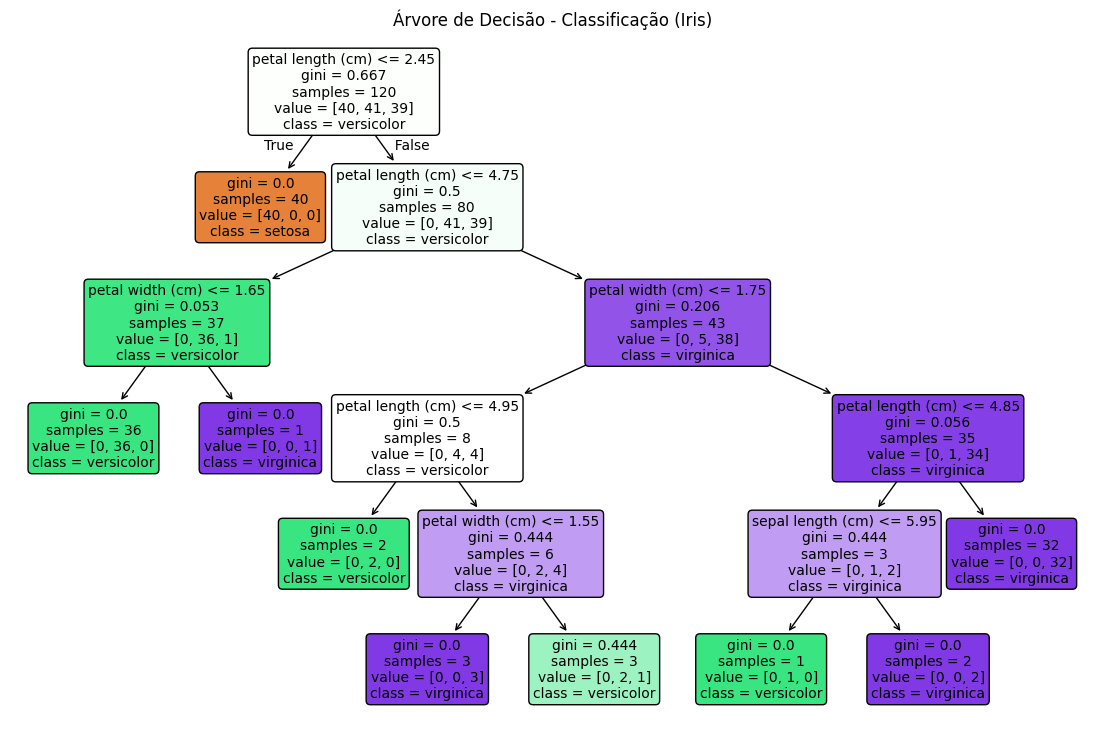

In [8]:
plt.figure(figsize=(14, 9))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão - Classificação (Iris)")
plt.show()

### Matriz de confusão (classificação)

Matriz de confusão:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


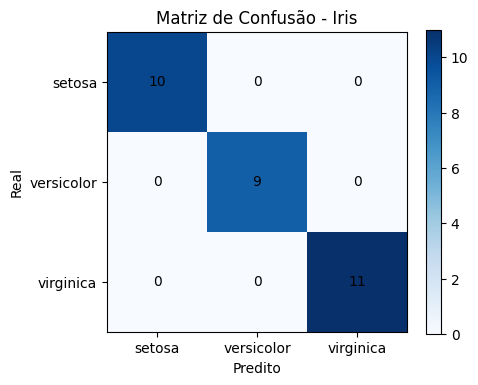

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:\n", cm)

# Plot simples da matriz de confusão com matplotlib puro
fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, cmap="Blues")
ax.set_title("Matriz de Confusão - Iris")
ax.set_xlabel("Predito")
ax.set_ylabel("Real")
ax.set_xticks(range(len(iris.target_names)))
ax.set_yticks(range(len(iris.target_names)))
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

## 2) Regressão — Diabetes

In [11]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

reg = DecisionTreeRegressor(max_depth=5, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 3526.0155119980145
RMSE: 59.38026197313392


### Comparação real vs predito (regressão)

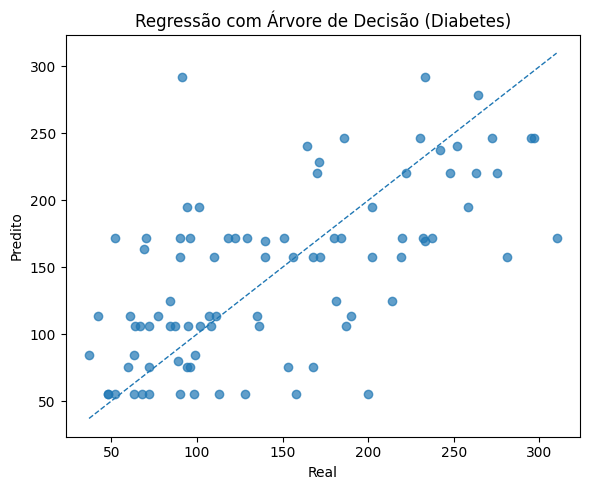

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title("Regressão com Árvore de Decisão (Diabetes)")
# linha de referência y=x
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', linewidth=1)
plt.tight_layout()
plt.show()

## 3) Dicas rápidas de tuning
- **max_depth**: controla a profundidade da árvore (mais profundo = mais chance de overfitting).
- **min_samples_split / min_samples_leaf**: mínimo de amostras para dividir/criar folha.
- **criterion**: `gini` ou `entropy` (classificação); `squared_error` (regressão).

Brinque alterando hiperparâmetros e veja como as métricas mudam.